# Startup Success Prediction

In [1]:
#Importing libreries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df= pd.read_csv("startup data.csv")
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
df.shape

(923, 49)

In [4]:
# Droping irrelevant columns 
df.drop(columns=['Unnamed: 0', 'id', 'object_id', 'Unnamed: 6'], inplace=True)

# EDA and data visualization

In [5]:
df.isna().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   city                      923 non-null    object 
 5   name                      923 non-null    object 
 6   labels                    923 non-null    int64  
 7   founded_at                923 non-null    object 
 8   closed_at                 335 non-null    object 
 9   first_funding_at          923 non-null    object 
 10  last_funding_at           923 non-null    object 
 11  age_first_funding_year    923 non-null    float64
 12  age_last_funding_year     923 non-null    float64
 13  age_first_milestone_year  771 non-null    float64
 14  age_last_m

## Univariate Analysis

<AxesSubplot:>

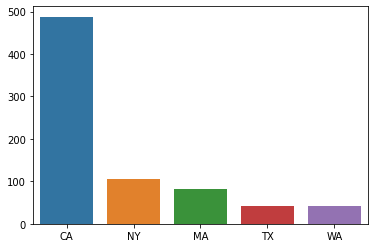

In [9]:
# Calculate the value counts
state_code_counts = df['state_code'].value_counts().head()

# Create a bar plot using Seaborn
sns.barplot(x=state_code_counts.index, y=state_code_counts.values)

<AxesSubplot:ylabel='status'>

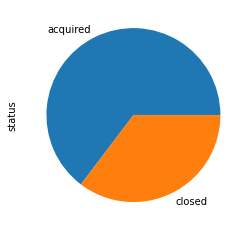

In [10]:
df.status.value_counts().plot(kind="pie") 

In [11]:
features = ['funding_total_usd', 'age_first_funding_year', 'age_last_funding_year', 'relationships',
                     'funding_rounds', 'avg_participants', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
                     'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
                     'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
                     'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',"status"]


In [12]:
data=df[features]
data.head()

,funding_total_usd,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,avg_participants,is_CA,is_NY,is_MA,is_TX,...,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,status
0,375000,2.2493,3.0027,3,3,1.0000,1,0,0,0,...,0,0,1,0,1,0,0,0,0,acquired
1,40100000,5.1260,9.9973,9,4,4.7500,1,0,0,0,...,0,0,0,1,0,0,1,1,1,acquired
2,2600000,1.0329,1.0329,5,1,4.0000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,acquired
3,40000000,3.1315,5.3151,5,3,3.3333,1,0,0,0,...,0,0,0,0,0,0,1,1,1,acquired
4,1300000,0.0000,1.6685,2,2,1.0000,1,0,0,0,...,0,0,0,1,1,0,0,0,0,closed


## Model and Evaluation

In [13]:
X=data.drop(columns="status")
y=data["status"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy: 76.76%
Classification Report:
              precision    recall  f1-score   support

    acquired       0.81      0.83      0.82       120
      closed       0.68      0.65      0.66        65

    accuracy                           0.77       185
   macro avg       0.75      0.74      0.74       185
weighted avg       0.77      0.77      0.77       185

Confusion Matrix:


<AxesSubplot:>

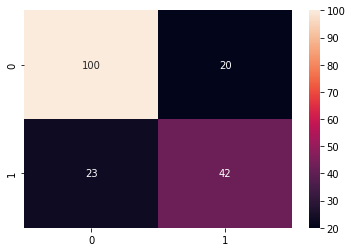

In [15]:
# Model Selection and Training
model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.5g')